# Introduction
Back to biology.  Up to this point we have been manipulating DNA strings in a variety of ways to transcribe, translate, express and align DNA.  But how do we look at this data without eyes glazing over or obscure statistical tests?

One way to approach these data is through visualization.  Data Visualization is a tool used in many fields to qualitatively assess data.  You’ve probably encountered basic data visualizations in your daily life.  Infographics with pie charts, bar graphs and scatter plots are all examples of data visualizations.

Before we can visualize data in python however, we need to get our data properly formatted.  One way to do this is to use a dataframe. A dataframe is a bunch of labeled vectors that hold information.  You can think of a vector as a series of numbers assigned to a variable.  By collating a bunch of vectors together, one can organize data in a coherent fashion for python plotting libraries to use.  To learn more about pandas and dataframes, see below.

In this assignment, you will play a pharmaceutical employee trying to analyze data from the lab by utilizing three python packages to aid your boss in visualizing your company's latest and greatest antibody candidates to treat cancers.  You’ll also do a lot of googling, so get a head start!

#### pandas package

Pandas is a python data analysis and manipulation library.  You’ll need to install it using your favorite package manager.  The basic structure involves vectors that are collated to become a dataframe.  You can learn more about pandas on your own.  Pandas also has its own method of plotting items.  You can use this or you can use the two other packages to generate your plots.

#### Matplotlib and Seaborn package

Matplotlib and seaborn are python visualization libraries.  Both the pandas and seaborn library use the matplotlib library to generate plots.  Seaborn can be thought of as a skin of matplotlib that makes it easier to generate pretty plots effortlessly.  

#### Logomaker package

The logomaker package is a python package that makes it easy to create beautiful sequence logo plots.  Sequence logo plots show nucleotide or amino acid characters with varying height corresponding to some type of biological importance against the nucleotide (DNA) or amino acid (protein) position in a strand.  Explore the package’s github to understand how it works.


## Task #1

Suppose you were given 3 DNA strands by a boss, who doesn’t like looking at numbers, reading code, and only wants to look at pretty pictures, and wants to know the percentages of nucleotides per given strand.  These three DNA strands code for a special antibody that can fight cancer.  The boss wants you to generate a plot describing the difference in percentages between the strands.  In this exercise, you will be plotting the percentage of each bases in 3 DNA strands. 

`CGATTGATACAGGGGACGGTGACGTCGTCATAGATTCGGCACGTTACCCTTGTAGGTGTGGAGCCACTTAGCTACGCGCCGAAGTCCCATGGCAAAACCGATGGACAATGATTCGGGTAGCACCAGGAGTCCGTAGCGCGTGCATCCCGGCGTGGCGCGCGTACAGCTTAACCACCGCTT`

`TTAATAGAGCATTCCGTTCGGGCATGGCAGTAAGTACGCCTTCTCAATTGTGCTAACCTTCATCCTTATCAAAGCTTGGAGCCAATGATCAGGATTATTGCCTTGCGACAGACTTCCTACTCACAGTCGCTCACATTGAGCTACTCGATGGGTCATCAGCTTGACCCGGTCTGTTGGGCC`

`GCGACTACGTGAGCCAGGGCTCCGGACCGCGCCGTATAGTCGGGCCCGATCCGGCCCCCGCAACTGCAAGCCCCAGCTTGTTCGGGTAACGTGGTTAGCCGAAGTTGCACGGGGTGCCCGCCGCGGAGTCCTCCCCGGGTGTCCCTCCTCCATCCGACGACGGGCGGCCGCCACCGCCGC`

#### Extract the ATCG counts from each strand of DNA as well as DNA length (python)

In [1]:
# Import appropriate packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker as lm
import numpy as np

In [2]:
# Assign sequences
s1 = 'CGATTGATACAGGGGACGGTGACGTCGTCATAGATTCGGCACGTTACCCTTGTAGGTGTGGAGCCACTTAGCTACGCGCCGAAGTCCCATGGCAAAACCGATGGACAATGATTCGGGTAGCACCAGGAGTCCGTAGCGCGTGCATCCCGGCGTGGCGCGCGTACAGCTTAACCACCGCTT'
s2 = 'TTAATAGAGCATTCCGTTCGGGCATGGCAGTAAGTACGCCTTCTCAATTGTGCTAACCTTCATCCTTATCAAAGCTTGGAGCCAATGATCAGGATTATTGCCTTGCGACAGACTTCCTACTCACAGTCGCTCACATTGAGCTACTCGATGGGTCATCAGCTTGACCCGGTCTGTTGGGCC'
s3 = 'GCGACTACGTGAGCCAGGGCTCCGGACCGCGCCGTATAGTCGGGCCCGATCCGGCCCCCGCAACTGCAAGCCCCAGCTTGTTCGGGTAACGTGGTTAGCCGAAGTTGCACGGGGTGCCCGCCGCGGAGTCCTCCCCGGGTGTCCCTCCTCCATCCGACGACGGGCGGCCGCCACCGCCGC'

In [3]:
# Write function that returns a dictionary of counts given an input string
def counter (DNA:str):
    '''Takes a DNA string and returns all the counts for ATCG'''
    a_dict = dict()
    for nucleotide in DNA:
        try:
            count = a_dict[nucleotide]    # try to get the value given nucleotide key
            count+=1
            a_dict.update({nucleotide:count})
        except:
            a_dict.update({nucleotide:1}) # if you got an error, assign that letter a value 1
    return(a_dict)

In [4]:
counter(s1) #test if it works. S1 is 60% GC, S2 is 50% GC, S3 is 70% GC

{'C': 50, 'G': 55, 'A': 39, 'T': 36}

#### Create a dataframe from the extracted data as well as calculate the percentage of ATCG using dataframe operations (pandas)

In [5]:
# Write function that turns items into a list assigned by ATCG
A = list()
T = list()
C = list()
G = list()
for sequence in [s1,s2,s3]:
    for nucleotide in ['A','T','C','G']:
        eval(nucleotide).append(counter(sequence)[nucleotide])

In [6]:
A

[39, 40, 24]

In [7]:
# Build your dataframe
df = pd.DataFrame({
    'Seq':['S1','S2','S3'],
    'A':A,
    'T':T,
    'C':C,
    'G':G
                  })

In [8]:
df

,Seq,A,T,C,G
0,S1,39,36,50,55
1,S2,40,52,48,40
2,S3,24,26,71,59


#### Melt your dataframe (turn it into a long data format) to aid in plotting (pandas)

In [9]:
pd.melt(df,id_vars=['Seq'], value_vars = ['A','T','C','G'])

,Seq,variable,value
0,S1,A,39
1,S2,A,40
2,S3,A,24
3,S1,T,36
4,S2,T,52
5,S3,T,26
6,S1,C,50
7,S2,C,48
8,S3,C,71
9,S1,G,55


In [10]:
df_melt = pd.melt(df,id_vars=['Seq'], value_vars = ['A','T','C','G'])

#### Create a barplot of the three strands and color it by strand 1/2/3. Add a legend.  Don’t forget to label your axes and title. (matplotlib, or seaborn)


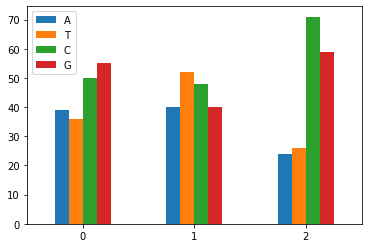

In [11]:
df.plot.bar(rot = 0) #with pandas builtin plots

Text(0.5, 1.0, 'This is a title')

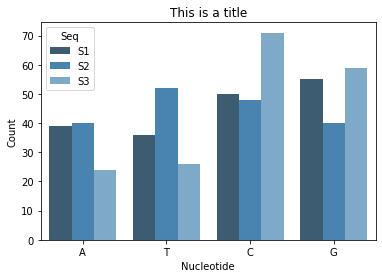

In [12]:
# With Seaborn
ax = sns.barplot(x='variable',y='value',hue='Seq',data=df_melt, palette = 'Blues_d')
ax.set_xlabel('Nucleotide')
ax.set_ylabel('Count')
ax.set_title('This is a title')

Text(0.5, 1.0, 'This is a title')

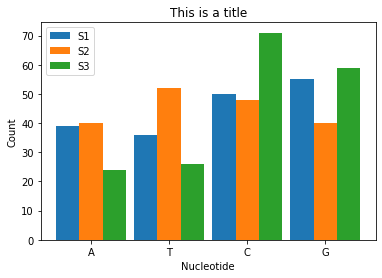

In [13]:
fig, ax = plt.subplots()

# making the figure
width = .30
for v,i in enumerate(['S1','S2','S3']):
    df2 = df_melt.query('Seq==@i')
    ax.bar(x = np.arange(len(df2['variable'])) + (width)*v,height = df2['value'],label = i, width = width)
    
# fix x-axis
ax.set_xticks(np.arange(len(df2['variable']))+width) # gives me 4 numbers under the columns
ax.set_xticklabels(df2.variable.unique())            # changes the name of those numbers

# get a legend
ax.legend()
ax.set_xlabel('Nucleotide')
ax.set_ylabel('Count')
ax.set_title('This is a title')

## Task #2
Antibodies, specifically IgG antibodies are made up of two light and two heavy chains.  The heavy chains are joined to the light chain and each other via disulfide bonds.  The resulting tetramer has two identical halves forming a Y-like shape.  Antibodies have 3 distinct regions, the variable, antigen-binding, and the constant region.

Suppose your boss is now interested in sequence variants, a position in a protein where the amino acid is different from a reference sequence (think consensus sequence but for proteins), in five different lead antibodies and wants to know what proteins and what position is different between all five candidates.  The downstream analytics lab hints that there are variants in the light chain variable region.  The analytics lab was nice and decided to give you the proteins DNA code that they sequenced.  As a bioinformatician, your goal is to take these five DNA fragments that code for a light variable chain in an antibody and return a sequence logo plot with the logomaker package.

`CCTGACGACAGTTGCGCGTCCGTATCAAAATCTTCTTAATAAGCCCCC`
`GTTACTGTTGGTTGAAGAGCCCAGAACGGATTGGCCAGATGTACAATT`
`ATATCACTTAATGACTTTTGGGTCACGGTGTGTTACCTTACAGGAATT`
`AGACCGTCCATTAATTTCCCTTGCATATATATTGCGTTTTTTTGTCTT`
`AGACCGTCCATTAATTTCCCTTGCATATATATTGCGTTTTTTTGTCTT`


#### Identify the fraction of nucleotides at each position.  If there are 2 A’s, 2 C’s and 1 G at position 1, the fraction of A’s is 0.4, T’s is 0, C’s is 0.4. G’s is 0.2

In [14]:
s01 = 'CCTGACGACAGTTGCGCGTCCGTATCAAAATCTTCTTAATAAGCCCCC'
s02 = 'GTTACTGTTGGTTGAAGAGCCCAGAACGGATTGGCCAGATGTACAATT'
s03 = 'ATATCACTTAATGACTTTTGGGTCACGGTGTGTTACCTTACAGGAATT'
s04 = 'AGACCGTCCATTAATTTCCCTTGCATATATATTGCGTTTTTTTGTCTT'
s05 = 'AGACCGTCCATTAATTTCCCTTGCATATATATTGCGTTTTTTTGTCTT'

In [15]:
def seq_counter(seq_list:list):
    '''takes a list of sequences and returns the count for each nucleotide in reference to a position'''
    
    # create an empty list of 0 to len of longest string of zeros
    biggest = max([len(i) for i in seq_list])
    A = [0 for i in range(0,biggest,1)]
    T = [0 for i in range(0,biggest,1)]
    C = [0 for i in range(0,biggest,1)]
    G = [0 for i in range(0,biggest,1)]
    
    for seq in seq_list:
        for ind,val in enumerate(seq):
            if val =='A':
                A[ind] +=1
            elif val == 'T':
                T[ind] +=1
            elif val == 'C':
                C[ind] +=1
            elif val == 'G':
                G[ind] +=1
    return({'A':A,'T':T,'C':C,'G':G})

#### Create a pandas dataframe with position as rows and nucleotides as columns

In [16]:
pd.DataFrame(seq_counter([s01,s02,s03,s04,s05]))

,A,T,C,G
0,3,0,1,1
1,0,2,1,2
2,3,2,0,0
3,1,1,2,1
4,1,0,4,0
5,1,1,1,2
6,0,2,1,2
7,1,2,2,0
8,0,2,3,0
9,4,0,0,1


In [17]:
logo_df = pd.DataFrame(seq_counter([s01,s02,s03,s04,s05]))

#### Create a logo plot using logo maker

In [18]:
# Turn things into fractions
logo_df2 = logo_df.copy()
for i in ['A','T','C','G']:
    logo_df2[i]=logo_df[i].apply(lambda x: x/5)

In [19]:
logo_df2

,A,T,C,G
0,0.6,0.0,0.2,0.2
1,0.0,0.4,0.2,0.4
2,0.6,0.4,0.0,0.0
3,0.2,0.2,0.4,0.2
4,0.2,0.0,0.8,0.0
5,0.2,0.2,0.2,0.4
6,0.0,0.4,0.2,0.4
7,0.2,0.4,0.4,0.0
8,0.0,0.4,0.6,0.0
9,0.8,0.0,0.0,0.2


findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


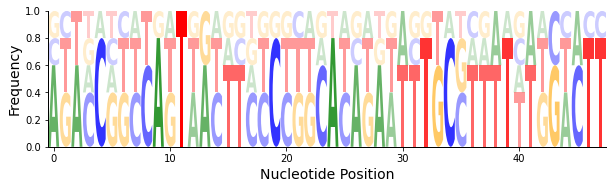

In [20]:
logo = lm.Logo(logo_df2,
               fade_probabilities = True,
               stack_order='small_on_top',
               font_name = 'Arial Rounded MT Bold')

logo.ax.set_xlabel('Nucleotide Position',fontsize = 14)
logo.ax.set_ylabel('Frequency',fontsize = 14)

# style logo spines
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True,)

#### Create a box and whisker plot with ATCG as your categorical variable and position of the nucleotide as your continuous variable. 


In [21]:
logo_df2['counts']=logo_df2.index

In [22]:
logo_df2['counts']=logo_df2['counts'].apply(lambda x: x+1)

In [23]:
logo_df2.head()

,A,T,C,G,counts
0,0.6,0.0,0.2,0.2,1
1,0.0,0.4,0.2,0.4,2
2,0.6,0.4,0.0,0.0,3
3,0.2,0.2,0.4,0.2,4
4,0.2,0.0,0.8,0.0,5


In [24]:
logo_df2.tail()

,A,T,C,G,counts
43,0.0,0.0,0.4,0.6,44
44,0.4,0.4,0.2,0.0,45
45,0.4,0.0,0.6,0.0,46
46,0.0,0.8,0.2,0.0,47
47,0.0,0.8,0.2,0.0,48


In [25]:
pd.melt(logo_df2,id_vars=['counts'], value_vars = ['A','T','C','G'])

,counts,variable,value
0,1,A,0.6
1,2,A,0.0
2,3,A,0.6
3,4,A,0.2
4,5,A,0.2
...,...,...,...
187,44,G,0.6
188,45,G,0.0
189,46,G,0.0
190,47,G,0.0


In [26]:
logo_df2melt = pd.melt(logo_df2,id_vars=['counts'], value_vars = ['A','T','C','G'])

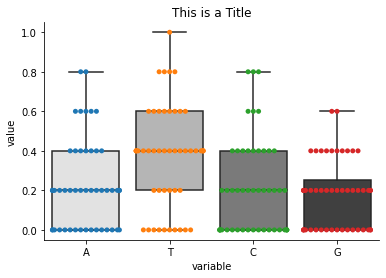

In [27]:
# Seaborn
ax = sns.boxplot(x = 'variable', y = 'value', data = logo_df2melt, palette = "Greys")
ax = sns.swarmplot(x = 'variable', y = 'value', data = logo_df2melt)
ax.set_title('This is a Title')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

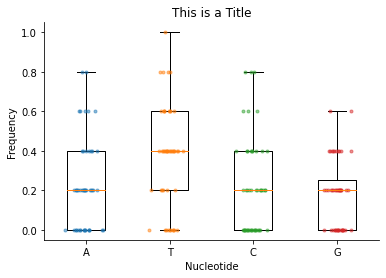

In [28]:
# Matplotlib
fig, ax = plt.subplots()

to_plot = [logo_df2['A'],logo_df2['T'],logo_df2['C'],logo_df2['G']] # setup your array to plot
pos = np.array(range(len(to_plot)))+1                               # setup position of your array

ax.boxplot(x = to_plot,positions = pos,)                            # plot box plot
ax.set_xticklabels(['A','T','C','G'])                               # changes the name of those numbers
ax.set_xlabel('Nucleotide')                                         # Add axis labels
ax.set_ylabel('Frequency')
ax.set_title('This is a Title')
# Add points
for data in pos:
    y = to_plot[data-1]
    x = np.random.normal(loc = data,scale = 0.08 ,size = len(y))    # create a random array of numbers centered
    
    ax.plot(x,y, '.', alpha = .5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### Create a scatter plot of all the “A” and “T” nucleotide positions in strand 1 against all the “A” and “T” nucleotide positions in strand 2.  Color the dots of “A” different from the dots of “T”.  If there are unequal amounts of “A”s and “T”s, cut off the excess and only plot pairs.

In [29]:
# Create your dataset
s01A = [i for i,v in enumerate(s01) if v == 'A']
s01T = [i for i,v in enumerate(s01) if v == 'T']
s02A = [i for i,v in enumerate(s02) if v == 'A']
s02T = [i for i,v in enumerate(s02) if v == 'T']

In [30]:
[len(i) for i in [s01A,s01T,s02A,s02T]]

[12, 12, 13, 13]

In [31]:
s02A=s02A[0:-1]
s02T=s02T[0:-1]

In [32]:
len(s02A)

12

In [33]:
df_scatter = pd.DataFrame({'A1':s01A,'T1':s01T,'A2':s02A,'T2':s02T})

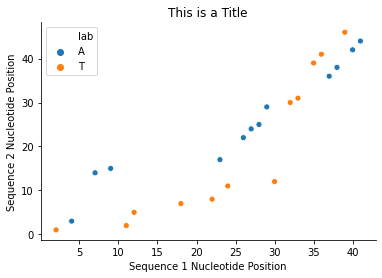

In [34]:
# seaborn
df_scatter2 = pd.DataFrame({'x':s01A+s01T,'y':s02A+s02T,'lab':['A' for i in s01A]+['T' for i in s02A]}) # Create df
ax = sns.scatterplot(x = 'x', y = 'y', hue = 'lab', data = df_scatter2)              # plot

ax.set_xlabel('Sequence 1 Nucleotide Position')
ax.set_ylabel('Sequence 2 Nucleotide Position')
ax.set_title('This is a Title')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

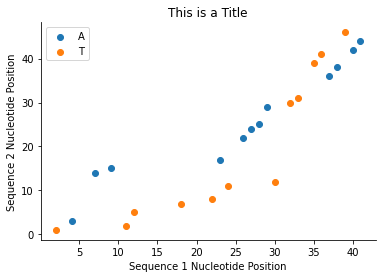

In [35]:
# Matplotlib
fig, ax = plt.subplots()
ax.scatter(x = df_scatter.A1, y = df_scatter.A2, label = 'A')
ax.scatter(x = df_scatter.T1, y = df_scatter.T2, label = 'T')
ax.set_xlabel('Sequence 1 Nucleotide Position')
ax.set_ylabel('Sequence 2 Nucleotide Position')
ax.set_title('This is a Title')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()

#### Create a line plot tracking the accumulation of nucleotide counts over time. 

In [36]:
seq_dict = dict()
seq_max = max([len(seq) for seq in [s01,s02,s03,s04,s05]])

for i in ['A','T','C','G']:
    seq_dict.update({i:[0 for g in range(0,seq_max,1)]}) # create a list of max vals * 0. add to atcg

In [37]:
# Count all the A's,T's,C's,G's and give the location via index.
for seq in [s01,s02,s03,s04,s05]:
    for i,nuc in enumerate(seq):
        val = seq_dict[nuc]
        val[i] = val[i]+1
        seq_dict.update({nuc:val})

In [38]:
# Example of logic to extract stepwise up
new_list = list() #create an empty list, without list comprehension
for i,val in enumerate(seq_dict['A']): # for every value in the list extracted
    if i == 0: # skip the first index
        new_list.append(val) 
    else: # add the previous
        nv = val + new_list[i-1]
        new_list.append(nv)

In [39]:

for seq in seq_dict.keys():
    new_list = list()
    for i, val in enumerate(seq_dict[seq]):
        if i == 0:
            new_list.append(val)
        else:
            nv = val + new_list[i-1]
            new_list.append(nv)
    seq_dict.update({seq:new_list})

In [40]:
step_df = pd.DataFrame(seq_dict)

In [41]:
step_df['ind']=step_df.index

In [42]:
step_df.head()

,A,T,C,G,ind
0,3,0,1,1,0
1,3,2,2,3,1
2,6,4,2,3,2
3,7,5,4,4,3
4,8,5,8,4,4


In [43]:
step_df.ind = step_df.ind.apply(lambda x: x+1) # add one to your index

In [44]:
# melt your dataframe
step_df_melt = pd.melt(step_df,id_vars=['ind'],value_vars = ['A','T','C','G'])

In [45]:
step_df_melt.head()

,ind,variable,value
0,1,A,3
1,2,A,3
2,3,A,6
3,4,A,7
4,5,A,8


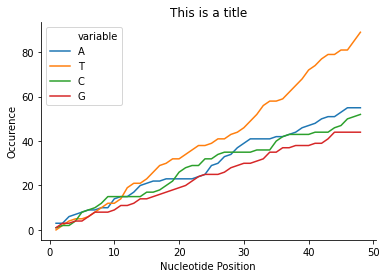

In [46]:
# Seaborn
ax = sns.lineplot(x = 'ind',
                  y = 'value',
                  hue = 'variable',
                  data =step_df_melt,
                  markers = True)

ax.set_ylabel('Occurence')
ax.set_xlabel('Nucleotide Position')
ax.set_title('This is a title')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Task #3
The analytics lab staff got fired and the new one-man hire can only give you protein sequences from the mass spectrometer because the hire is still learning.  The one-man analytics lab gives you these five protein fragments.  As a bioinformatician, use the logomaker package to create a sequence logo plot of your amino acid sequence variants.

`KGCCKLEVRTKQFMSPFIGEEGPFREYLTPCCTTQHEYAWKTQSDITV`
`KGCKKLEVRTKQFRSPFIGEEGPFREYLTPCCATQHEYAWKTQSDITV`
`KGCLKLEVRTKQFMSPFIGEEGPFREYLTPCCWTQHEYAWKTQSDITV`
`KGCTKLEVRTKQFRSPFIGEEGPFREYGTPCCETQHEYAWKTQSDITV`
`KGCQKLEVRTKQFMSPFIGEEGPFREYGTPCCETQHEYAWKTQSDITV`


#### Identify the fraction of amino acid at each given position (same as above but now with amino acids)

In [47]:
p1 = 'KGCCKLEVRTKQFMSPFIGEEGPFREYLTPCCTTQHEYAWKTQSDITV'
p2 = 'KGCKKLEVRTKQFRSPFIGEEGPFREYLTPCCATQHEYAWKTQSDITV'
p3 = 'KGCLKLEVRTKQFMSPFIGEEGPFREYLTPCCWTQHEYAWKTQSDITV'
p4 = 'KGCTKLEVRTKQFRSPFIGEEGPFREYGTPCCETQHEYAWKTQSDITV'
p5 = 'KGCQKLEVRTKQFMSPFIGEEGPFREYGTPCCETQHEYAWKTQSDITV'

In [48]:
pset = {i for i in p1+p2+p3+p4+p5} # add all AA items into a set

In [49]:
len(pset)

19

In [50]:
protein_dict = dict() # create a dictionary to store the amino acids, i'm not going to create 19 lists to add stuff to.
biggest_protein = max([len(i) for i in [p1,p2,p3,p4,p5]]) # get me all the lengths of each protein, then give me the max len
for i in list(pset): # for item in the unique AA (19 of them) add the AA to dict with a bunch of zeros
    protein_dict.update({i:[0 for i in range(0,biggest_protein,1)]})

In [51]:
for protein in [p1,p2,p3,p4,p5]:
    for i, AA in enumerate(protein):
        v = protein_dict[AA]
        v[i]=v[i]+1
        protein_dict.update({AA:v})

In [52]:
protein_dict

{'T': [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  1,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  0,
  5,
  0],
 'C': [0,
  0,
  5,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'H': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'A': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'K': [5,
  0,
 

#### Create a pandas dataframe with position as rows and amino acid’s as columns

In [53]:
pd.DataFrame(protein_dict).head()

,T,C,H,A,K,V,I,M,D,S,R,P,L,Q,F,W,Y,E,G
0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# Normalize by dividing by number of proteins strings analyzed (divide by 5)
for k in protein_dict.keys():
    v = protein_dict[k]
    nv = [val/5 for val in v]
    protein_dict.update({k:nv})    

#### Create a logo plot using logo maker

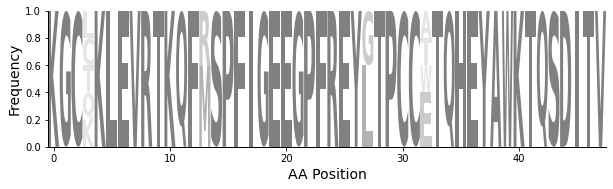

In [55]:
aa = lm.Logo(pd.DataFrame(protein_dict),
        fade_probabilities = True,
        stack_order = 'small_on_top',
        font_name = 'Arial Rounded MT Bold')

aa.ax.set_xlabel('AA Position',fontsize = 14)
aa.ax.set_ylabel('Frequency',fontsize = 14)

# style logo spines
aa.style_spines(visible=False)
aa.style_spines(spines=['left','bottom'], visible=True,)